No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


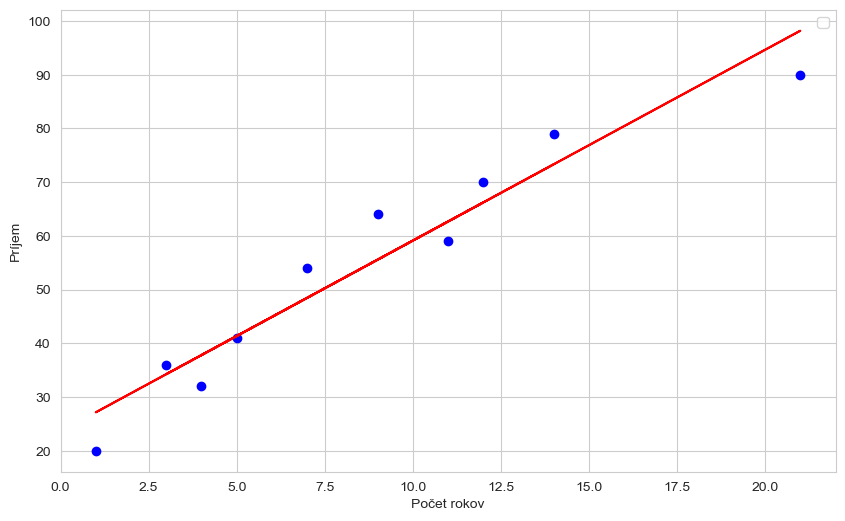

   poc_rokov     prijem
0         10  59.118369
1         15  76.881325
2         20  94.644281


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

pr = pd.DataFrame({
    'poc_rokov': [4, 7, 9, 12, 3, 5, 11, 21, 1, 14],
    'prijem': [32, 54, 64, 70, 36, 41, 59, 90, 20, 79]
})

model = LinearRegression()
X = pr[['poc_rokov']]
y = pr['prijem']
model.fit(X, y)

pr['predicted'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(pr['poc_rokov'], pr['prijem'], color='blue')
plt.plot(pr['poc_rokov'], pr['predicted'], color='red')
plt.xlabel('Počet rokov')
plt.ylabel('Príjem')
plt.legend()
plt.show()

pr1 = pd.DataFrame({
    'poc_rokov': [10, 15, 20]
})

pr1['prijem'] = model.predict(pr1[['poc_rokov']])

print(pr1)


In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

state = pd.read_csv('state_data.csv')

state_train = state.iloc[:5]
state_test = state.iloc[5:]

X_train = state_train[['Illiteracy', 'Life.Exp']]
y_train = state_train['Murder']
X_test = state_test[['Illiteracy', 'Life.Exp']]
y_test = state_test['Murder']

model2 = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

state_test = state_test.copy()
state_test['Murder_predict'] = y_pred

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(state_test)
print(mae)
print(mse)
print(rmse)


FileNotFoundError: [Errno 2] No such file or directory: 'state_data.csv'

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

co2 = pd.read_csv('co2_data.csv')

co2.drop(columns='Plant', inplace=True)

X = co2.drop(columns=['Treatment'])
y = co2['Treatment']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

co2_tree = DecisionTreeClassifier(random_state=42)
co2_tree.fit(X_train, y_train)

FileNotFoundError: [Errno 2] No such file or directory: 'co2_data.csv'

In [4]:
from sklearn.tree import export_text

tree_rules = export_text(co2_tree, feature_names=list(X_train.columns))
print(tree_rules)

plt.figure(figsize=(20,10))
plot_tree(co2_tree, feature_names=X_train.columns, class_names=co2_tree.classes_, filled=True, rounded=True)
plt.show()

NameError: name 'co2_tree' is not defined

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

testPred_tree = co2_tree.predict(X_test)

tbl = confusion_matrix(y_test, testPred_tree)
print("Confusion Matrix:")
print(tbl)

accuracy = accuracy_score(y_test, testPred_tree)
precision = precision_score(y_test, testPred_tree, average='weighted')
recall = recall_score(y_test, testPred_tree, average='weighted')
f1 = f1_score(y_test, testPred_tree, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

NameError: name 'co2_tree' is not defined

In [6]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

NameError: name 'X_train' is not defined